### Application

In [2]:
from langgraph.graph import StateGraph, END, START
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langchain_core.tools import tool


In [4]:
llm = init_chat_model("google_genai:gemini-2.0-flash")

In [16]:
# craete a data class
from dataclasses import dataclass, field
from typing import List

# this is the data that we will form.
# this will be used to create the config.json needed for airflow
# Note: everything is flattened, for simplicity.
@dataclass
class ConfigVars:
  title: str
  collection: str
  description: str
  extent__spatial__bbox: str
  extent__temporal__interval: List[List[str]]
  dashboard_is_periodic: bool
  dashboard_time_density: str
  # and more
  ctype: str = field(default="Collection")
  

In [17]:
from typing import TypedDict, Annotated
import operator

# here along with the messaege, the graph node will share the configs.
# whatever is missing will be filled in the process by nodes/agents in the graph.
class AgentState(TypedDict):
  messages: Annotated[list, operator.add]
  configs: ConfigVars

In [23]:
import json

# node 1
def get_cmr_keys(cmr: json) -> List[str]:
  """
  From the CMR json response, get the list of keys.
  Basically letting us know, what variables and values
  are available for us to work with. 
  """
  pass

In [25]:
# node 2
def find_missing_variables(cmr_keys: List[str], stac_config_keys: List[str]) -> List[str]:
  """
  Given a list of available CMR keys and the STAC needed keys, find the list of missing keys.
  """
  pass


In [ ]:
# tools for node 3, which is a react agent

@tool
def find_dashboard_is_periodic(concept_id: str) -> bool:
  """
  Provided the concept_id from cmr, use it to get the list of granules.
  based on the granules, figure out the periodicity
  """
  
# many more tools 
  
tools = [find_dashboard_is_periodic]

filler_react_agent = create_react_agent(llm, tools)

In [31]:
# node 3
def call_filler_react_agent(state: AgentState):
  """
  for the missing value in the state.configs variables,
  try to fill in the value using available tools.
  Maybe create a template with system message to command it to do so
  """
  results = filler_react_agent.invoke({"messages": state["messages"]})
  return {"messages": [result]}

In [34]:
# node 4
def formulate_stac_config(config: ConfigVars) -> dict:
  """
  use the flattened configVars and then
  formulate the necessary config json
  """
  return {}

In [36]:
# node 5
def create_collection(stac_config: dict) -> None:
  """
  request the airflow create_collection DAG, with the complete STAC config.json
  """
  return None

In [43]:
# finally create a graph
graph_builder = StateGraph(AgentState)

graph_builder.add_node("get_cmr_keys", get_cmr_keys)
graph_builder.add_node("find_missing_variables", find_missing_variables)
graph_builder.add_node("call_filler_react_agent", call_filler_react_agent)
graph_builder.add_node("formulate_stac_config", formulate_stac_config)
graph_builder.add_node("create_collection", create_collection)

graph_builder.add_edge(START, "get_cmr_keys")
graph_builder.add_edge("get_cmr_keys", "find_missing_variables")
graph_builder.add_edge("find_missing_variables", "call_filler_react_agent")
graph_builder.add_edge("call_filler_react_agent", "formulate_stac_config")
graph_builder.add_edge("formulate_stac_config", "create_collection")
graph_builder.add_edge("create_collection", END)

graph = graph_builder.compile()


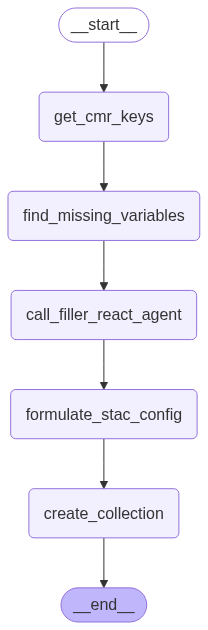

In [44]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except exception:
  pass

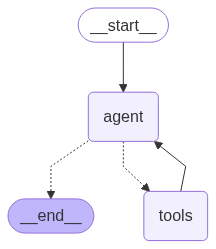

In [45]:
from IPython.display import Image, display

try:
  display(Image(filler_react_agent.get_graph().draw_mermaid_png()))
except exception:
  pass